<a href="https://colab.research.google.com/github/pbjenkins42/SaaS-A-B-Test/blob/main/Pricing_A_B_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

# read test_results.csv and user_table.csv
test_results = pd.read_csv('test_results.csv')
user_table = pd.read_csv('user_table.csv')

print(test_results.head())
print(test_results.tail)

print(user_table.head())
print(user_table.tail)

   user_id            timestamp          source  device operative_system  \
0   604839  2015-05-08 03:38:34    ads_facebook  mobile              iOS   
1   624057  2015-05-10 21:08:46      seo-google  mobile          android   
2   317970  2015-04-04 15:01:23        ads-bing  mobile          android   
3   685636  2015-05-07 07:26:01  direct_traffic  mobile              iOS   
4   820854  2015-05-24 11:04:40    ads_facebook     web              mac   

   test  price  converted  
0     0     39          0  
1     0     39          0  
2     0     39          0  
3     1     59          0  
4     0     39          0  
<bound method NDFrame.tail of         user_id            timestamp           source  device  \
0        604839  2015-05-08 03:38:34     ads_facebook  mobile   
1        624057  2015-05-10 21:08:46       seo-google  mobile   
2        317970  2015-04-04 15:01:23         ads-bing  mobile   
3        685636  2015-05-07 07:26:01   direct_traffic  mobile   
4        820854  201

In [52]:
# EDA and Cleaning
# the test randomly assigned 33% of the users to the new price and 66% to the old price
# we need to verify this
# count number of records in both test_results and user_table
print('Count of records in test_results:', len(test_results))
print('Count of records in user_table:', len(user_table))

# from test results count number of records where test column = 1 and test column = 0
print('Count of records where test column = 1:', len(test_results[test_results['test'] == 1]))
print('Count of records where test column = 0:', len(test_results[test_results['test'] == 0]))

# divide both results by the count of records in test_results
print('Percentage of records in test group:', len(test_results[test_results['test'] == 1]) / len(test_results)*100)
print('Percentage of records in control group:', len(test_results[test_results['test'] == 0]) / len(test_results)*100)

# check the average price per group where [test_results['test'] == 1]
print('Average price per test group:', test_results[test_results['test'] == 1]['price'].mean().round(2))
print('Average price per control group:', test_results[test_results['test'] == 0]['price'].mean().round(2))


Count of records in test_results: 316800
Count of records in user_table: 275616
Count of records where test column = 1: 114073
Count of records where test column = 0: 202727
Percentage of records in test group: 36.00789141414141
Percentage of records in control group: 63.99210858585859
Average price per test group: 58.97
Average price per control group: 39.02


36% of records are in the test group and 64% are in the control group. Our project document says they should be 33% in test and 67% in control, while there is a varation its only 3% which could come from random sampling.

The average prices are off but only ever so slightly. This shows some records have the wrong price but there are very few so this shoud not skew results

In [53]:
# EDA and Cleaning
# data looks pretty clean but we will want to create a merged df of test_results and user_table
df_merged = pd.merge(test_results, user_table, on='user_id', how='left')
print(df_merged.head())
print('Total records:', len(df_merged))

# check merged document for nulls
print('\nRows with Nulls:\n', df_merged.isnull().sum())

# convert timestamp column to datetime, trying this lead to an error, we have some invalid timestamps
# df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])
# test_results['timestamp'] = pd.to_datetime(test_results['timestamp'])
invalid_timestamps = df_merged[pd.to_datetime(df_merged['timestamp'], errors='coerce').isna()]
print(invalid_timestamps)

# in df_merged find the max and min timestamps
print('\nMax timestamp:', df_merged['timestamp'].max())
print('Min timestamp:', df_merged['timestamp'].min())

# show data types
print('\nData Types:')
print(df_merged.dtypes)

   user_id            timestamp          source  device operative_system  \
0   604839  2015-05-08 03:38:34    ads_facebook  mobile              iOS   
1   624057  2015-05-10 21:08:46      seo-google  mobile          android   
2   317970  2015-04-04 15:01:23        ads-bing  mobile          android   
3   685636  2015-05-07 07:26:01  direct_traffic  mobile              iOS   
4   820854  2015-05-24 11:04:40    ads_facebook     web              mac   

   test  price  converted          city country    lat   long  
0     0     39          0       Buffalo     USA  42.89 -78.86  
1     0     39          0     Lakeville     USA  44.68 -93.24  
2     0     39          0         Parma     USA  41.38 -81.73  
3     1     59          0  Fayetteville     USA  35.07 -78.90  
4     0     39          0       Fishers     USA  39.95 -86.02  
Total records: 316800

Rows with Nulls:
 user_id                 0
timestamp               0
source                  0
device                  0
operative_syst

Not sure if we need the timestamp column to be converted to Datetime as we have 4503 rows with invalid time stamps. example: 2015-04-24 12:60:46 the 60 is invalid

Our test was run from 2015-03-02 00:04:12 to 2015-05-31 23:59:45 roughly 2 months.


In [54]:
# Fix timesamps so they can be converted into Datetime

# split timestamp into date and timestamp
df_merged['date'] = df_merged['timestamp'].str.split(' ').str[0]
df_merged['time'] = df_merged['timestamp'].str.split(' ').str[1]

print(df_merged.head())

# convert date to datetime
df_merged['date'] = pd.to_datetime(df_merged['date'])

   user_id            timestamp          source  device operative_system  \
0   604839  2015-05-08 03:38:34    ads_facebook  mobile              iOS   
1   624057  2015-05-10 21:08:46      seo-google  mobile          android   
2   317970  2015-04-04 15:01:23        ads-bing  mobile          android   
3   685636  2015-05-07 07:26:01  direct_traffic  mobile              iOS   
4   820854  2015-05-24 11:04:40    ads_facebook     web              mac   

   test  price  converted          city country    lat   long        date  \
0     0     39          0       Buffalo     USA  42.89 -78.86  2015-05-08   
1     0     39          0     Lakeville     USA  44.68 -93.24  2015-05-10   
2     0     39          0         Parma     USA  41.38 -81.73  2015-04-04   
3     1     59          0  Fayetteville     USA  35.07 -78.90  2015-05-07   
4     0     39          0       Fishers     USA  39.95 -86.02  2015-05-24   

       time  
0  03:38:34  
1  21:08:46  
2  15:01:23  
3  07:26:01  
4  11:04:4

In [55]:
# split data into test and control
test_group = test_results[test_results['test'] == 1]
control_group = test_results[test_results['test'] == 0]

# pull only converted records for each group
converted_test_group = test_group[test_group['converted'] == 1]
converted_control_group = control_group[control_group['converted'] == 1]

# find total revenue per test and control groups
total_revenue_test = converted_test_group['price'].sum()
total_revenue_control = converted_control_group['price'].sum()
print('Total Revenue for Test Group: $', total_revenue_test)
print('Total Revenue for Control Group: $', total_revenue_control)
# find percentage difference betwee total_revenue_test and total_revenue_control
percentage_difference = ((total_revenue_control - total_revenue_test) / total_revenue_test) * 100
print('Control Group ', percentage_difference.round(2),'% higher')

# Find number of users per group, use full population counts from test_results
num_users_test = len(test_results[test_results['test'] == 1])
num_users_control = len(test_results[test_results['test'] == 0])
print('\nNumber of Users for Test Group:', num_users_test)
print('Number of Users for Control Group:', num_users_control)
# find percentage differenec between num_users_control and num_users_test
percentage_difference2 = ((num_users_control - num_users_test) / num_users_test) * 100
print('Control Group ', percentage_difference2,'% higher')

# find number of converted users per group
num_converted_test = len(converted_test_group)
num_converted_control = len(converted_control_group)
print('\nNumber of Converted Users for Test Group:', num_converted_test)
print('Number of Converted Users for Control Group:', num_converted_control)

# find conversion rate per group
conversion_rate_test = test_group['converted'].mean()*100
conversion_rate_control = control_group['converted'].mean()*100
print('\nConversion Rate for Test Group:', conversion_rate_test.round(4),'%')
print('Conversion Rate for Control Group:', conversion_rate_control.round(4),'%')

# Revenue per user (corrected)
revenue_per_user_test = total_revenue_test / num_users_test
revenue_per_user_control = total_revenue_control / num_users_control
print('\nRevenue per User for Test Group: $', revenue_per_user_test.round(2))
print('Revenue per User for Control Group: $', revenue_per_user_control.round(2))
# find percentage difference between revenue_per_user_test and revenue_per_user_control
percentage_difference3 = ((revenue_per_user_test - revenue_per_user_control) / revenue_per_user_control) * 100
print('Test Group ', percentage_difference3.round(2),'% higher')


# find revenue per converted user per group
revenue_per_converted_user_test = total_revenue_test / num_converted_test
revenue_per_converted_user_control = total_revenue_control / num_converted_control
print('\nRevenue per Converted User for Test Group: $',revenue_per_converted_user_test.round(2))
print('Revenue per Converted User for Control Group: $',revenue_per_converted_user_control.round(2))

Total Revenue for Test Group: $ 104587
Total Revenue for Control Group: $ 157465
Control Group  50.56 % higher

Number of Users for Test Group: 114073
Number of Users for Control Group: 202727
Control Group  77.71690058120677 % higher

Number of Converted Users for Test Group: 1773
Number of Converted Users for Control Group: 4035

Conversion Rate for Test Group: 1.5543 %
Conversion Rate for Control Group: 1.9904 %

Revenue per User for Test Group: $ 0.92
Revenue per User for Control Group: $ 0.78
Test Group  18.04 % higher

Revenue per Converted User for Test Group: $ 58.99
Revenue per Converted User for Control Group: $ 39.02


Total Revenue for the test Group is 104,587 and control is 157,465. Control group is 50.56% higher revenue but with 77% more users the test group has to have a higher revenue per user

Conversion rate is higher in the control group at 1.978% and test group is at 1.543%. While this could be a red flag if we're focused on conversion rate since we are raising prices we need to look at revenue per user to get the most accurate kpi.

Revenue per converted user in both groups is almost a perfect match to the prices charged showing that users only buy once during the test window.


In [56]:
# Calculate per-user revenue arrays (price if converted, else 0)
revenue_per_user_test = df_merged[df_merged['test'] == 1]['price'] * df_merged[df_merged['test'] == 1]['converted']
revenue_per_user_control = df_merged[df_merged['test'] == 0]['price'] * df_merged[df_merged['test'] == 0]['converted']

# Then run t-test
from scipy import stats
test = stats.ttest_ind(revenue_per_user_test, revenue_per_user_control, equal_var=False)

# Print results
print('T-test:', test.statistic)
print('P-test:', test.pvalue)
if test.pvalue > 0.05:
    print("Non-significant results")
elif test.statistic > 0:
    print("Statistically better results")
else:
    print("Statistically worse results")



T-test: 5.657213077474457
P-test: 1.5407498604678382e-08
Statistically better results


The test group generated significantly more revenue per user than the control group.


In [57]:
from scipy import stats

# Check conversion rate for both groups
print(df_merged.groupby('test')['converted'].mean())

# Perform a t-test on the binary 'converted' column
test = stats.ttest_ind(
    df_merged[df_merged['test'] == 1]['converted'],  # test group conversions
    df_merged[df_merged['test'] == 0]['converted'],  # control group conversions
    equal_var=False  # Welch's t-test: better when variances may differ
)

# Output results
print("T-statistic:", test.statistic)
print("P-value:", test.pvalue)

# Interpretation
if test.pvalue > 0.05:
    print("Non-significant difference in conversion rates.")
elif test.statistic > 0:
    print("Test group has significantly higher conversion rate.")
else:
    print("Test group has significantly lower conversion rate.")


test
0    0.019904
1    0.015543
Name: converted, dtype: float64
T-statistic: -9.08604644689466
P-value: 1.0339496325938206e-19
Test group has significantly lower conversion rate.


With the Test group showing a smaller conversion rate but a much higher avg revenue per customer we need to dive deeper to understand if the higher revenue per user out weighs the lower conversion rate

In [58]:
# Verify groups are properly randomized

# List of columns to check
columns_to_check = ['source', 'device', 'operative_system', 'city', 'country']

# Generate frequency tables for each column
for col in columns_to_check:
    grouped = df_merged.groupby(col)['test'].agg(
        frequency_test_0=lambda x: (x == 0).sum(),
        frequency_test_1=lambda x: (x == 1).sum()
    )
    print(f"\nDistribution by '{col}':")
    print(grouped)



Distribution by 'source':
                 frequency_test_0  frequency_test_1
source                                             
ads-bing                    14609              8264
ads-google                  37864             21515
ads-yahoo                    4818              2765
ads_facebook                34099             19297
ads_other                   19284             10592
direct_traffic              38759             21598
friend_referral             13135              7560
seo-bing                     1334               819
seo-google                  15102              8073
seo-other                    5889              3371
seo-yahoo                    4363              2485
seo_facebook                13471              7734

Distribution by 'device':
        frequency_test_0  frequency_test_1
device                                    
mobile            120481             65990
web                82246             48083

Distribution by 'operative_system':
         

The distributions are very close to our 36%/64% split so the data looks to be properly randomized

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
import pandas as pd

# Select only low-cardinality, relevant columns
features = df_merged[['source', 'device', 'operative_system', 'country', 'test']]

# One-hot encode
X = pd.get_dummies(features.drop(columns=['test']), drop_first=False)
y = features['test']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree
tree = DecisionTreeClassifier(
    max_depth=3,
    min_impurity_decrease=0.001,
    class_weight='balanced',
    random_state=42
)
tree.fit(X_train, y_train)

# Display decision tree rules
print(export_text(tree, feature_names=list(X.columns)))

# Optional accuracy check
print(f"\nModel Accuracy: {tree.score(X_test, y_test):.4f}")


|--- class: 0


Model Accuracy: 0.6409


There is no detectable bias in assignment.
User distributions between test and control are statistically indistinguishable.

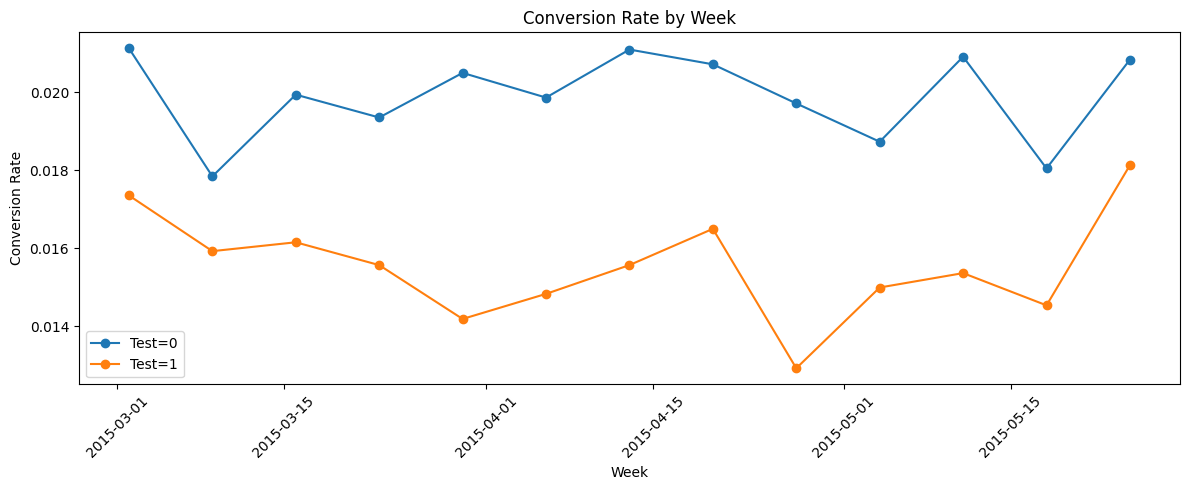

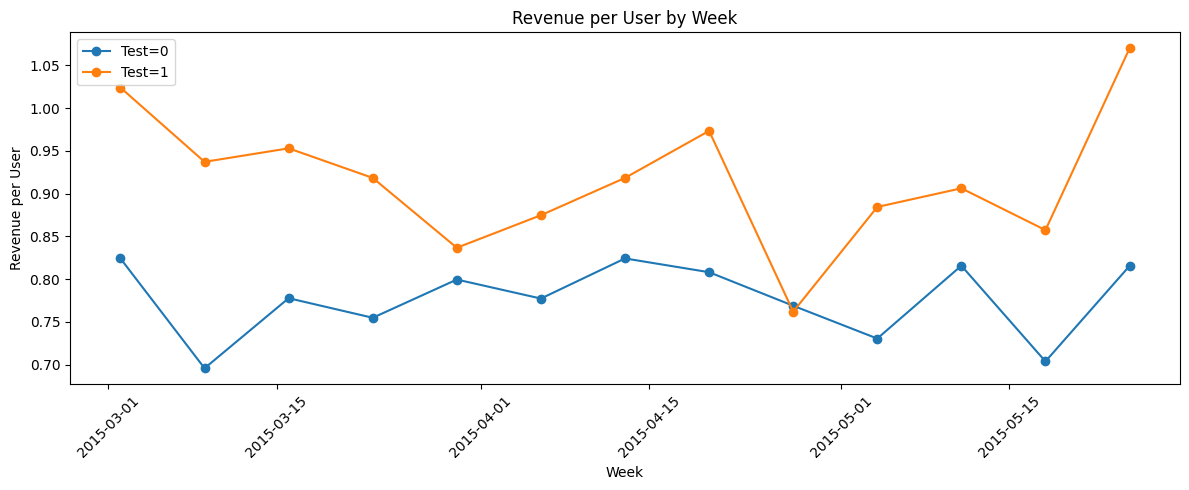

In [60]:
# Check for Novelty Effect

# Create a 'week' column (or use 'day' for finer granularity)
df_merged['week'] = df_merged['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by test group and week, calculate mean conversion
conversion_by_week = df_merged.groupby(['test', 'week'])['converted'].mean().reset_index()

# Optional: also get revenue per user
df_merged['revenue'] = df_merged['price'] * df_merged['converted']
rpu_by_week = df_merged.groupby(['test', 'week'])['revenue'].mean().reset_index()

# Line graph to plot conversion_by_week and rpu_by_week
import matplotlib.pyplot as plt

# Plot Conversion Rate by Week
plt.figure(figsize=(12, 5))
for label, df_subset in conversion_by_week.groupby('test'):
    plt.plot(df_subset['week'], df_subset['converted'], marker='o', label=f'Test={label}')
plt.title('Conversion Rate by Week')
plt.xlabel('Week')
plt.ylabel('Conversion Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Revenue per User by Week
plt.figure(figsize=(12, 5))
for label, df_subset in rpu_by_week.groupby('test'):
    plt.plot(df_subset['week'], df_subset['revenue'], marker='o', label=f'Test={label}')
plt.title('Revenue per User by Week')
plt.xlabel('Week')
plt.ylabel('Revenue per User')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





Test group (orange) starts slightly below control and remains consistently lower throughout.

There is no visible spike early on that drops off — in fact, the conversion rate is relatively flat with some mild week-to-week noise.

No clear sign of early excitement or engagement from users exposed to the test.

Test group (orange) consistently outperforms the control (blue).

There’s an initial spike in the first week, followed by a gentle decline, then a rebound in the final week.

However, even during the dip, the test group's RPU remains above the control.

This could hint at slight novelty influence in Week 1, but it’s not drastic — the advantage persists well beyond that.

No major novelty spike observed.

We can confidently recommend going with the 59 price point over the 39 price point

In [61]:
# Projecting revenue for control group with $59 price and 1.55% test conversion rate

# Separate groups
test_group = df_merged[df_merged['test'] == 1]
control_group = df_merged[df_merged['test'] == 0]

# 1. Get actual revenue from the test group
test_revenue = test_group['price'][test_group['converted'] == 1].sum()

# 2. Get the conversion rate from the test group
test_conversion_rate = test_group['converted'].mean()

# 3. Project how many control users would convert at the test rate
projected_control_conversions = len(control_group) * test_conversion_rate

# 4. Use the $59 price point to calculate projected control revenue
projected_control_revenue = projected_control_conversions * 59

# 5. Projected total revenue = actual test revenue + projected control revenue
projected_total_revenue = test_revenue + projected_control_revenue

print('Projected Total Revenue with $59 Price Point:', projected_total_revenue)


Projected Total Revenue with $59 Price Point: 290491.318190983


In [66]:
# Project what revenue would look like if the test group was moved back to the $39 price

# 1. Use control group conversion rate (at $39)
control_conversion_rate = control_group['converted'].mean()

# 2. Project number of conversions we would have seen in the test group at the control rate
projected_test_conversions_at_39 = len(test_group) * control_conversion_rate

# 3. Project test group revenue at $39 using that conversion volume
projected_test_revenue_at_39 = projected_test_conversions_at_39 * 39

# 4. Combine with actual control group revenue (unchanged)
actual_control_revenue = control_group['price'][control_group['converted'] == 1].sum()

# 5. Total projected revenue if both groups were at $39
projected_total_revenue_if_all_39 = projected_test_revenue_at_39 + actual_control_revenue

print("Projected Total Revenue with $39 Price Point:", projected_total_revenue_if_all_39)
print("Projected % Revenue Difference:", (projected_total_revenue - projected_total_revenue_if_all_39)/ projected_total_revenue_if_all_39*100)

Projected Total Revenue with $39 Price Point: 246013.13441228843
Projected % Revenue Difference: 18.079597207259045


While the test conversion rate is below the control group the total projected revenue is ~18.1% higher in test group showing that the test is successful and the new higher price leads to higher revenues. We will do a little more digging to see if we can find any ways to improve the conversion rate


--- Segment Analysis by source ---


,source,user_count_control,user_count_test,conversion_rate_control,conversion_rate_test,revenue_per_user_control,revenue_per_user_test,conversion_diff_pct,rpu_diff
8,seo-google,15102,8073,0.017547,0.015979,39.018541,58.967794,-0.156815,19.949253
4,ads_other,19284,10592,0.015401,0.012462,39.029040,58.958459,-0.293913,19.929420
1,ads-google,37864,21515,0.022554,0.019614,39.010036,58.983267,-0.294018,19.973232
5,direct_traffic,38759,21598,0.013545,0.010094,39.024252,58.964812,-0.345171,19.940559
0,ads-bing,14609,8264,0.013348,0.009560,39.034225,58.958858,-0.378840,19.924632
11,seo_facebook,13471,7734,0.017445,0.013576,39.014847,58.968968,-0.386847,19.954121
9,seo-other,5889,3371,0.017490,0.012459,39.033962,58.964402,-0.503103,19.930441
2,ads-yahoo,4818,2765,0.016812,0.011212,39.024907,58.956600,-0.560038,19.931694
3,ads_facebook,34099,19297,0.023666,0.016842,39.014663,58.983417,-0.682439,19.968754
6,friend_referral,13135,7560,0.041721,0.033466,39.021317,58.992063,-0.825499,19.970746


<ipython-input-68-2206535913>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


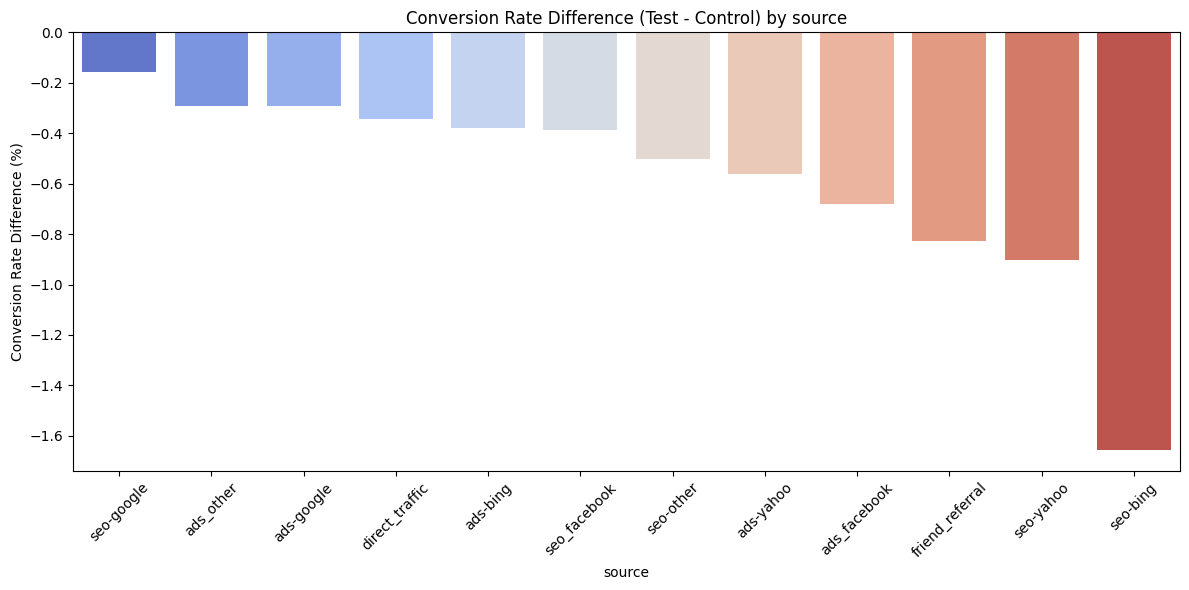


--- Segment Analysis by device ---


,device,user_count_control,user_count_test,conversion_rate_control,conversion_rate_test,revenue_per_user_control,revenue_per_user_test,conversion_diff_pct,rpu_diff
0,mobile,120481,65990,0.019879,0.016139,39.018592,58.972117,-0.373984,19.953525
1,web,82246,48083,0.019940,0.014725,39.023831,58.973795,-0.521564,19.949964


<ipython-input-68-2206535913>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


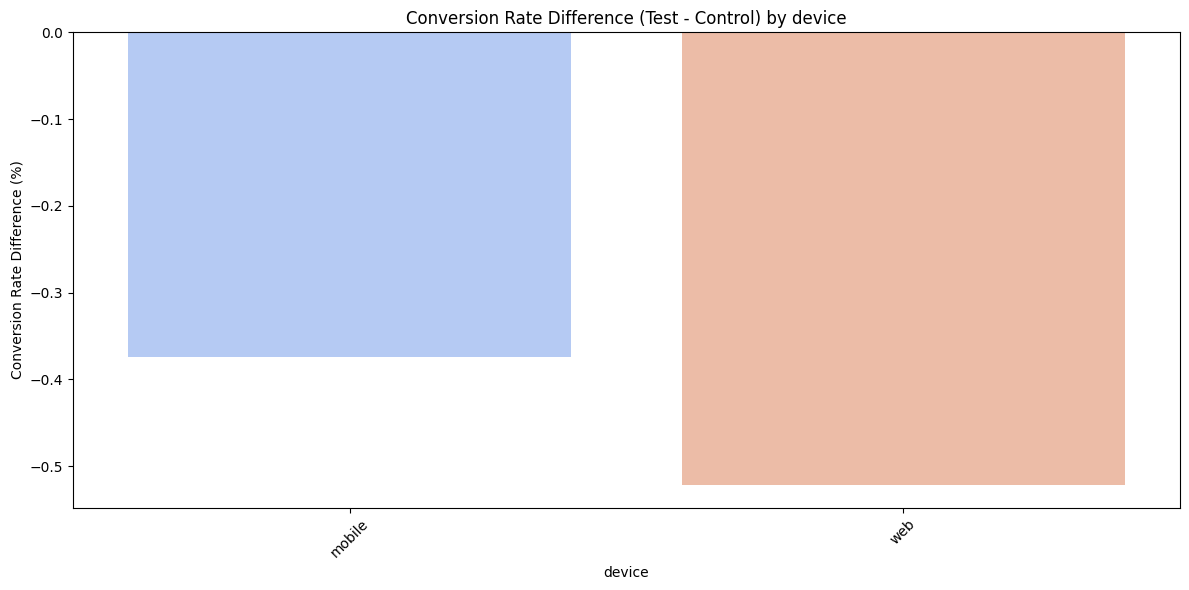


--- Segment Analysis by operative_system ---


,operative_system,user_count_control,user_count_test,conversion_rate_control,conversion_rate_test,revenue_per_user_control,revenue_per_user_test,conversion_diff_pct,rpu_diff
4,other,10498,5706,0.014003,0.011041,39.032387,58.964949,-0.296166,19.932562
1,iOS,61855,33610,0.023587,0.019994,39.020047,58.970247,-0.359337,19.950200
0,android,48210,26725,0.016366,0.012348,39.013690,58.976052,-0.401791,19.962362
3,mac,16366,8719,0.025480,0.021218,39.025663,58.979355,-0.426162,19.953692
5,windows,63591,37385,0.018698,0.013990,39.023274,58.972181,-0.470805,19.948908
2,linux,2207,1928,0.015406,0.000000,39.027186,58.979253,-1.540553,19.952067


<ipython-input-68-2206535913>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


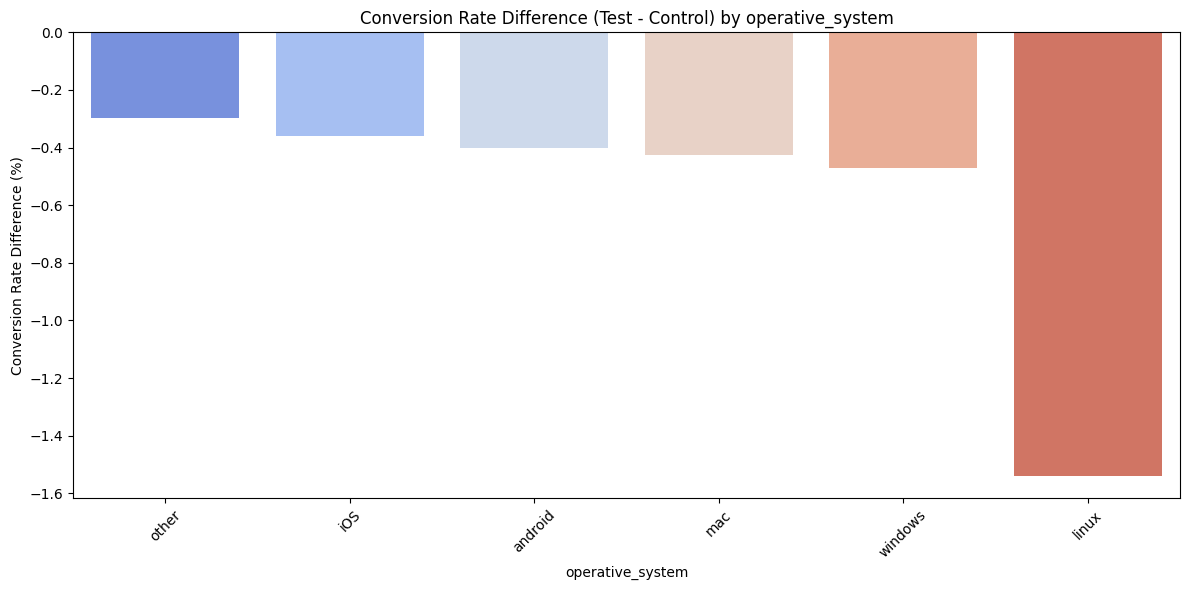

In [68]:
# looking for insights to raise conversion rate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def segment_analysis(df, feature):
    summary = (
        df.groupby([feature, 'test'])
        .agg(
            user_count=('user_id', 'count'),
            conversion_rate=('converted', 'mean'),
            revenue_per_user=('price', 'mean')
        )
        .reset_index()
    )

    pivot = summary.pivot(index=feature, columns='test')
    pivot.columns = [f"{metric}_{'test' if group == 1 else 'control'}" for metric, group in pivot.columns]
    pivot = pivot.reset_index()

    pivot['conversion_diff_pct'] = (pivot['conversion_rate_test'] - pivot['conversion_rate_control']) * 100
    pivot['rpu_diff'] = pivot['revenue_per_user_test'] - pivot['revenue_per_user_control']

    return pivot.sort_values(by='conversion_diff_pct', ascending=False)


def plot_segment_comparison(df, feature):
    segment_data = segment_analysis(df, feature)

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=segment_data,
        x=feature,
        y='conversion_diff_pct',
        palette='coolwarm'
    )
    plt.xticks(rotation=45)
    plt.title(f"Conversion Rate Difference (Test - Control) by {feature}")
    plt.ylabel('Conversion Rate Difference (%)')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()


# Run for key features
features = ['source', 'device', 'operative_system']

for feature in features:
    print(f"\n--- Segment Analysis by {feature} ---")
    display(segment_analysis(df_merged, feature))  # Use display in Jupyter, print otherwise
    plot_segment_comparison(df_merged, feature)


Most price-sensitive sources:

seo-bing (−1.65%), seo-yahoo (−0.90%), friend_referral (−0.83%), ads_facebook (−0.68%)

These segments lost the most conversions when exposed to $59.

Action:

Consider running targeted promotions or price A/B tests for seo-bing, ads_facebook, and friend_referral traffic.

Explore why referral traffic is more price-sensitive — perhaps expectations set by friends are misaligned with higher price.

Device Sensitivity
Web users had a larger conversion drop (−0.52%) than mobile users (−0.37%) — but both show significant declines.

Action:

Improve desktop UX or landing page copy to better justify the $59 price.

Consider testing shorter copy, testimonials, or urgency prompts specifically for web visitors.

Operating System Sensitivity
Linux users dropped to 0% conversion at $59. (Small sample size, but notable.)

iOS and Android users show modest conversion drops (~−0.35% to −0.40%).

Action:

Consider custom onboarding or pricing tests for Linux users or since they are such a small segment we can probably ignore them.

For mobile OS users (iOS/Android), test mobile checkout optimizations or value framing to ease price friction.

Despite all segments showing some conversion drop under the test condition, revenue per user remains higher across the board.
This confirms that while price sensitivity exists, it is outweighed by the lift in revenue per user — reinforcing the conclusion that the $59 price is preferable for overall profitability.

These patterns can be used to target price-sensitive groups with promotions or alternate messaging while maintaining the higher price point for more resilient segments.

In [72]:
# Price elasticity score

def segment_analysis_with_elasticity(df, feature, price_control=39.0, price_test=59.0):
    summary = (
        df.groupby([feature, 'test'])
        .agg(
            user_count=('user_id', 'count'),
            conversion_rate=('converted', 'mean'),
            revenue_per_user=('price', 'mean')
        )
        .reset_index()
    )

    pivot = summary.pivot(index=feature, columns='test')
    pivot.columns = [f"{metric}_{'test' if group == 1 else 'control'}" for metric, group in pivot.columns]
    pivot = pivot.reset_index()

    # Conversion rate difference
    pivot['conversion_diff_pct'] = (pivot['conversion_rate_test'] - pivot['conversion_rate_control']) * 100
    pivot['rpu_diff'] = pivot['revenue_per_user_test'] - pivot['revenue_per_user_control']

    # Elasticity: change in conversion rate / change in price
    delta_conversion = pivot['conversion_rate_test'] - pivot['conversion_rate_control']
    delta_price = price_test - price_control  # Assumed constant
    pivot['price_elasticity_score'] = delta_conversion / delta_price

    return pivot.sort_values(by='price_elasticity_score')

features = ['source', 'device', 'operative_system']

for feature in features:
    print(f"\n--- Segment Analysis with Elasticity by {feature} ---")
    display(segment_analysis_with_elasticity(df_merged, feature))


--- Segment Analysis with Elasticity by source ---


,source,user_count_control,user_count_test,conversion_rate_control,conversion_rate_test,revenue_per_user_control,revenue_per_user_test,conversion_diff_pct,rpu_diff,price_elasticity_score
7,seo-bing,1334,819,0.029985,0.013431,39.074963,58.902320,-1.655399,19.827357,-0.000828
10,seo-yahoo,4363,2485,0.019482,0.010463,39.032088,59.000000,-0.901923,19.967912,-0.000451
6,friend_referral,13135,7560,0.041721,0.033466,39.021317,58.992063,-0.825499,19.970746,-0.000413
3,ads_facebook,34099,19297,0.023666,0.016842,39.014663,58.983417,-0.682439,19.968754,-0.000341
2,ads-yahoo,4818,2765,0.016812,0.011212,39.024907,58.956600,-0.560038,19.931694,-0.000280
9,seo-other,5889,3371,0.017490,0.012459,39.033962,58.964402,-0.503103,19.930441,-0.000252
11,seo_facebook,13471,7734,0.017445,0.013576,39.014847,58.968968,-0.386847,19.954121,-0.000193
0,ads-bing,14609,8264,0.013348,0.009560,39.034225,58.958858,-0.378840,19.924632,-0.000189
5,direct_traffic,38759,21598,0.013545,0.010094,39.024252,58.964812,-0.345171,19.940559,-0.000173
1,ads-google,37864,21515,0.022554,0.019614,39.010036,58.983267,-0.294018,19.973232,-0.000147



--- Segment Analysis with Elasticity by device ---


,device,user_count_control,user_count_test,conversion_rate_control,conversion_rate_test,revenue_per_user_control,revenue_per_user_test,conversion_diff_pct,rpu_diff,price_elasticity_score
1,web,82246,48083,0.019940,0.014725,39.023831,58.973795,-0.521564,19.949964,-0.000261
0,mobile,120481,65990,0.019879,0.016139,39.018592,58.972117,-0.373984,19.953525,-0.000187



--- Segment Analysis with Elasticity by operative_system ---


,operative_system,user_count_control,user_count_test,conversion_rate_control,conversion_rate_test,revenue_per_user_control,revenue_per_user_test,conversion_diff_pct,rpu_diff,price_elasticity_score
2,linux,2207,1928,0.015406,0.000000,39.027186,58.979253,-1.540553,19.952067,-0.000770
5,windows,63591,37385,0.018698,0.013990,39.023274,58.972181,-0.470805,19.948908,-0.000235
3,mac,16366,8719,0.025480,0.021218,39.025663,58.979355,-0.426162,19.953692,-0.000213
0,android,48210,26725,0.016366,0.012348,39.013690,58.976052,-0.401791,19.962362,-0.000201
1,iOS,61855,33610,0.023587,0.019994,39.020047,58.970247,-0.359337,19.950200,-0.000180
4,other,10498,5706,0.014003,0.011041,39.032387,58.964949,-0.296166,19.932562,-0.000148


Source-level elasticity highlights severe price sensitivity in certain SEO and ad channels.
seo-bing shows the highest elasticity score (−0.000828), meaning its conversion rate dropped the most per dollar of price increase.
This is followed by seo-yahoo and friend_referral, indicating that these users are highly price-sensitive and may require price-specific campaigns or messaging adjustments.

Referral and SEO traffic segments are consistently more elastic than paid ads from Google or Facebook.
Top-performing ad sources like ads-google and ads-other show relatively mild conversion decline per dollar increase (elasticity ≈ −0.000147), suggesting these segments may be less deterred by the price hike.

Device-level elasticity shows web users are more price-sensitive than mobile users.
Web users have an elasticity score of −0.000261, compared to −0.000187 for mobile users.
This confirms that desktop users are more likely to abandon at the higher price, potentially due to context (e.g., casual browsing vs. mobile urgency).

Among operating systems, Linux users are by far the most price-sensitive.
With an elasticity score of −0.000770 and a drop to 0% conversion, this group is likely outside the product’s ideal customer profile.
All other OS types show moderate elasticity, with Windows and Mac slightly more affected than iOS or Android.

In [74]:
# checking test duration

from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Define observed conversion rates
p1 = 0.0198  # control
p2 = 0.0154  # test

# Calculate effect size
effect_size = proportion_effectsize(p1, p2)

# Perform power analysis
analysis = NormalIndPower()
required_n = analysis.solve_power(effect_size=effect_size, power=0.8, alpha=0.05, ratio=2)  # control:test = 2:1

# Show required sample size per group
print(f"Required sample size for control group: {required_n:.0f}")
print(f"Required sample size for test group: {required_n / 2:.0f}")


Required sample size for control group: 10474
Required sample size for test group: 5237


This provides strong evidence that the test duration was sufficient from a sample size and statistical power perspective. This concludes we need minimum 10474 users in control and 5237 in test group and our acutal sample sizes are much larger. Also our plots above show that conversion rate and revenue per user are relatively stable. This leads us to conclude that the duration of the test was more than sufficient for an accurate test.

Conclusion

Based on our analysis of the pricing A/B test, we recommend adopting the $59 price point. While the test group showed a lower conversion rate compared to the control group, the revenue per user (RPU) was consistently higher, resulting in greater overall revenue potential. This indicates that the increased price more than compensates for the drop in conversion, making it the more profitable option. We project that the new price of 59 will bring in 290491 dollars in revenue while the old price of 39 will bring in 246013 dollars in revenue which means the new price has the potential of a significant 18.1% increase in revenue

Further analysis revealed that user response to pricing varies across segments, with mobile users and SEO-sourced traffic demonstrating greater price sensitivity. These insights present opportunities for targeted interventions, such as personalized discounts or messaging, to improve conversion rates among more price-sensitive segments.

Regarding test duration, our sample size calculations confirmed that we have surpassed the threshold required for statistically significant results. In addition, weekly trend charts for conversion rate and RPU show consistent, stable patterns over time, with no signs of novelty effects or test drift. This suggests the test has matured sufficiently, and further data collection is unlikely to change the outcome